<a href="https://colab.research.google.com/github/JedRoundy/Machine_Learning_For_Economists/blob/main/Housing_Prices_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/MyDrive/Fall_2023/Econ_484/Kaggle_Competition'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Fall_2023/Econ_484/Kaggle_Competition


In [2]:
#ML steps
#1 Get labeled Dataset
#2 Wrangle, clean the dataset
#3 Divide into training and test set (already done for us)
#4 Pick appropriate method
#5 Choose regularization param w/ cross val
#6 fit model on entire training set
#7 Evaluate model on test set
#8 repeat 4-7 for diff methods
#9 Estimate final model using training and test set together

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Sklean
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


pd.set_option('display.max_rows', 10)  # None means show all rows
pd.set_option('display.max_columns', None)  # None means show all columns

In [4]:
# @title Step 1

housing = pd.read_csv('https://raw.githubusercontent.com/JedRoundy/Machine_Learning_For_Economists/main/data/kaggle/train.csv')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [17]:
# @title Step 2
#Handle missing vals

#Here, I went with 250 as the cutoff after using graphs like msno and a correlation heatmap. After that, it seemed like it was more of a problem with the rows than the columns.


#Drop columns with lots of missig values
for col in housing.columns:
  if housing[col].isna().sum() > 250:
    housing.drop(col, axis = 1, inplace = True)

#Drop remaining rows with missing vals
housing.dropna(inplace = True)


housing.set_index(keys = "Id")

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Years_Old,Remod_Yrs_Old,Garage_Yrs_Old,no_WoodDeckSF,no_OpenPorchSF,no_EnclosedPorch,no_3SsnPorch,no_ScreenPorch,no_PoolArea,no_Fireplaces
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,123,53,103.0,1,0,1,1,1,1,1
2,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,96,26,76.0,0,1,1,1,1,1,0
3,2-STORY 1946 & NEWER,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,121,52,101.0,1,0,1,1,1,1,0
4,2-STORY 1945 & OLDER,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,35,20,98.0,1,0,0,1,1,1,0
5,2-STORY 1946 & NEWER,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,120,50,100.0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,119,50,99.0,1,0,1,1,1,1,0
1457,1-STORY 1946 & NEWER ALL STYLES,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,98,38,78.0,0,1,1,1,1,1,0
1458,2-STORY 1945 & OLDER,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,61,56,41.0,1,0,1,1,1,1,0


In [20]:


housing['MSSubClass'].replace({ 20:	'1-STORY 1946 & NEWER ALL STYLES',
        30:	'1-STORY 1945 & OLDER',
        40:	'1-STORY W/FINISHED ATTIC ALL AGES',
        45:	'1-1/2 STORY - UNFINISHED ALL AGES',
        50:	'1-1/2 STORY FINISHED ALL AGES',
        60:	'2-STORY 1946 & NEWER',
        70:	'2-STORY 1945 & OLDER',
        75:	'2-1/2 STORY ALL AGES',
        80:	'SPLIT OR MULTI-LEVEL',
        85:	'SPLIT FOYER',
        90:	'DUPLEX - ALL STYLES AND AGES',
       120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:	'1-1/2 STORY PUD - ALL AGES',
       160:	'2-STORY PUD - 1946 & NEWER',
       180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'}, inplace = True)


#I transform these vars to mean how old the house is
housing[['Years_Old']] = housing[['YearBuilt']] - min(housing['YearBuilt'])
housing[['Remod_Yrs_Old']] = housing[['YearRemodAdd']] - min(housing['YearRemodAdd'])
housing[['Garage_Yrs_Old']] = housing[['GarageYrBlt']] - min(housing['GarageYrBlt'])

drop_ = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
housing.drop(drop_, inplace = True, axis = 1)



housing[['MoSold', 'YrSold', 'OverallQual', 'OverallCond']] = housing[['MoSold', 'YrSold', 'OverallQual', 'OverallCond']].astype('string')

amenities = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fireplaces']
for amen in amenities:
  housing[f'no_{amen}'] = housing[amen].apply(lambda x: 1 if x == 0 else 0)

housing_d = pd.get_dummies(housing)

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 string[python],
 string[python],
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 string

In [7]:
# @title Split and Standardize
housing_d.set_index(keys = "Id")

X = housing_d.drop('SalePrice', axis = 1)
y = housing_d['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)







In [ ]:
# @title Random Forest: .756

#best params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}

rfr = RandomForestRegressor(max_depth= 20, min_samples_split= 2, n_estimators= 300, random_state= 0)
rfr.fit(X_train_s, y_train)
rfr.score(X_test_s, y_test)

param_rfr = {'n_estimators': [100, 300, 500], 'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'random_state': [0]}

grid_rfr = GridSearchCV(rfr, param_rfr, verbose = 3, return_train_score= True, cv = 4)
rfr_model = grid_rfr.fit(X_train_s, y_train)

In [47]:

print(rfr_model.score(X_test_s, y_test))

0.7567834191464993


In [9]:
# @title Linear Regression: -2.88

#OLS is not very well suited for the job...

ols = LinearRegression()
ols.fit(X_train_s, y_train)
ols.score(X_test_s, y_test)

-2.8824045948936787e+21

In [39]:
# @title Lasso: .515

lasso = Lasso()
lasso.fit(X_train_s, y_train)
lasso.score(X_test_s, y_test)

param_lasso = {'alpha': np.arange(300, 400, 1)}


#Best alpha =
grid_lasso = GridSearchCV(lasso, param_lasso, verbose = 3, return_train_score= True, cv = 4)
model_lasso = grid_lasso.fit(X_train_s, y_train)


print(model_lasso.score(X_test_s, y_test))

0.5157431601614331


In [ ]:
# @title Ridge: .592
ridge = Ridge()

param_ridge = {'alpha': np.arange(1, 300, 1)}

grid_ridge = GridSearchCV(ridge, param_ridge, verbose = 3, return_train_score= True, cv = 4)
model_ridge = grid_ridge.fit(X_train_s, y_train)
print(model_ridge.score(X_test_s, y_test))



In [42]:
# @title Bayesian Ridge: .548

bridge = BayesianRidge()

param_bridge = {'n_iter': [100, 200, 300, 500, 1000]}

grid_bridge = GridSearchCV(bridge, param_bridge, verbose = 3, return_train_score= True)
model_bridge = grid_bridge.fit(X_train_s, y_train)

model_bridge.score(X_test_s, y_test)

0.5481607876491734

In [44]:
# @title Elastic Net: .54

e_net = ElasticNet()

param_net = {'alpha': np.arange(1, 200, 2), 'l1_ratio': np.arange(1, 100, 2)}

grid_net = GridSearchCV(e_net, param_net, verbose = 3, return_train_score= True)
model_net = grid_bridge.fit(X_train_s, y_train)

print(model_bridge.score(X_test_s, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....n_iter=100;, score=(train=0.943, test=0.915) total time=   0.3s
[CV 2/5] END ....n_iter=100;, score=(train=0.944, test=0.922) total time=   0.2s
[CV 3/5] END ....n_iter=100;, score=(train=0.953, test=0.874) total time=   0.2s
[CV 4/5] END ....n_iter=100;, score=(train=0.949, test=0.897) total time=   0.3s
[CV 5/5] END ....n_iter=100;, score=(train=0.950, test=0.879) total time=   0.2s
[CV 1/5] END ....n_iter=200;, score=(train=0.943, test=0.915) total time=   0.2s
[CV 2/5] END ....n_iter=200;, score=(train=0.944, test=0.922) total time=   0.2s
[CV 3/5] END ....n_iter=200;, score=(train=0.953, test=0.874) total time=   0.2s
[CV 4/5] END ....n_iter=200;, score=(train=0.949, test=0.897) total time=   0.2s
[CV 5/5] END ....n_iter=200;, score=(train=0.950, test=0.879) total time=   0.2s
[CV 1/5] END ....n_iter=300;, score=(train=0.943, test=0.915) total time=   0.3s
[CV 2/5] END ....n_iter=300;, score=(train=0.944,

<Axes: >

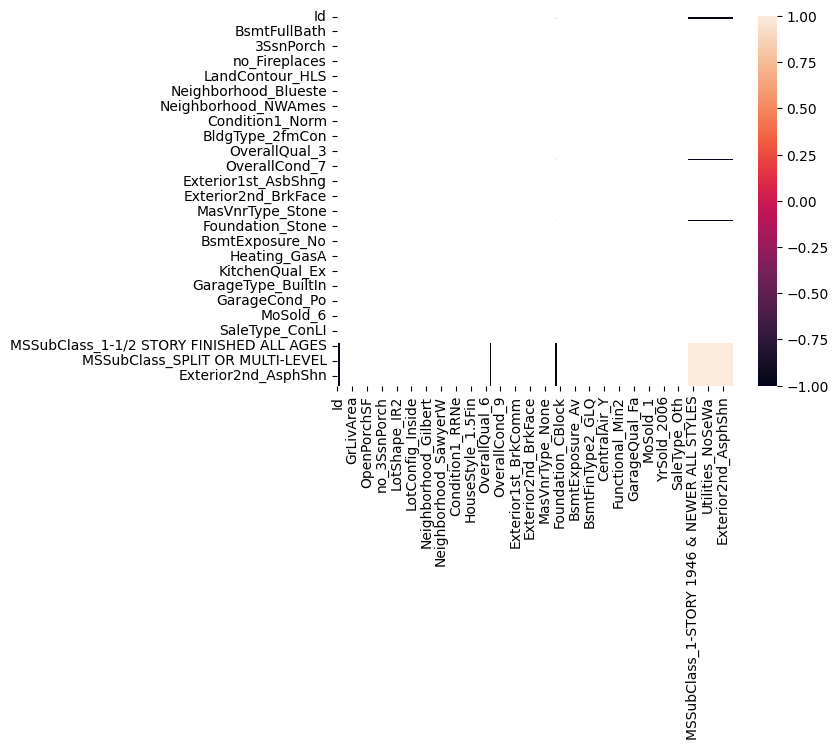

In [60]:
# @title Join Train and Test



housing_test = pd.read_csv('https://raw.githubusercontent.com/JedRoundy/Machine_Learning_For_Economists/main/data/kaggle/test.csv')


# @title Step 2
#Handle missing vals

#Drop columns with lots of missig values
for col in housing_test.columns:
  if housing_test[col].isna().sum() > 250:
    housing_test.drop(col, axis = 1, inplace = True)

#Drop remaining rows with missing vals
housing_test.dropna(inplace = True)


housing.set_index(keys = "Id")

housing['MSSubClass'].replace({ 20:	'1-STORY 1946 & NEWER ALL STYLES',
        30:	'1-STORY 1945 & OLDER',
        40:	'1-STORY W/FINISHED ATTIC ALL AGES',
        45:	'1-1/2 STORY - UNFINISHED ALL AGES',
        50:	'1-1/2 STORY FINISHED ALL AGES',
        60:	'2-STORY 1946 & NEWER',
        70:	'2-STORY 1945 & OLDER',
        75:	'2-1/2 STORY ALL AGES',
        80:	'SPLIT OR MULTI-LEVEL',
        85:	'SPLIT FOYER',
        90:	'DUPLEX - ALL STYLES AND AGES',
       120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:	'1-1/2 STORY PUD - ALL AGES',
       160:	'2-STORY PUD - 1946 & NEWER',
       180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'}, inplace = True)


#I transform these vars to mean how old the house is
housing_test[['Years_Old']] = housing_test[['YearBuilt']] - min(housing_test['YearBuilt'])
housing_test[['Remod_Yrs_Old']] = housing_test[['YearRemodAdd']] - min(housing_test['YearRemodAdd'])
housing_test[['Garage_Yrs_Old']] = housing_test[['GarageYrBlt']] - min(housing_test['GarageYrBlt'])

drop_ = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
housing_test.drop(drop_, inplace = True, axis = 1)



housing_test[['MoSold', 'YrSold', 'OverallQual', 'OverallCond']] = housing_test[['MoSold', 'YrSold', 'OverallQual', 'OverallCond']].astype('string')

amenities = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fireplaces']
for amen in amenities:
  housing_test[f'no_{amen}'] = housing_test[amen].apply(lambda x: 1 if x == 0 else 0)

housing_test_d = pd.get_dummies(housing_test)


#Merge og and test
housing_total = pd.concat([housing_test_d, housing_d])

sns.heatmap(housing_total.isna().corr())

housing_total.drop(['Id', ])




